# Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Reading required files

In [2]:
my_data = pd.read_csv('data.csv')
my_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
my_data.shape

(170653, 19)

In [4]:
my_data_by_genere = pd.read_csv('data_by_genres.csv')
my_data_by_genere.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [5]:
my_data_by_year = pd.read_csv('data_by_year.csv')
my_data_by_year.head()

,year,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity
0,1921,0.425661,0.236784,0.425495,100.397758,-17.095437,1,7,0.895823,0.322330,0.215814,0.077258,229911.9141,0.351562
1,1922,0.480000,0.237026,0.534056,101.376139,-19.179958,1,10,0.939236,0.440470,0.238647,0.115419,167904.5417,0.138889
2,1923,0.568462,0.246936,0.624788,112.456598,-14.373882,1,0,0.976329,0.401932,0.236656,0.098619,178356.3018,5.727811
3,1924,0.548654,0.347033,0.668574,120.653359,-14.202304,1,10,0.935575,0.583955,0.237875,0.090210,188461.6498,0.603376
4,1925,0.571890,0.264373,0.616430,115.671715,-14.516707,1,5,0.965422,0.408893,0.243094,0.115457,184130.6996,2.707224


# Check for null values

In [6]:
my_data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [7]:
my_data_by_genere.isnull().sum()


mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [8]:
my_data_by_year.isnull().sum()

year                0
danceability        0
energy              0
valence             0
tempo               0
loudness            0
mode                0
key                 0
acousticness        0
instrumentalness    0
liveness            0
speechiness         0
duration_ms         0
popularity          0
dtype: int64

In [9]:
pip install yellowbrick


You are using pip version 8.1.1, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Checking the fearure correlation , with our assumed dependent variable 'Popularity'

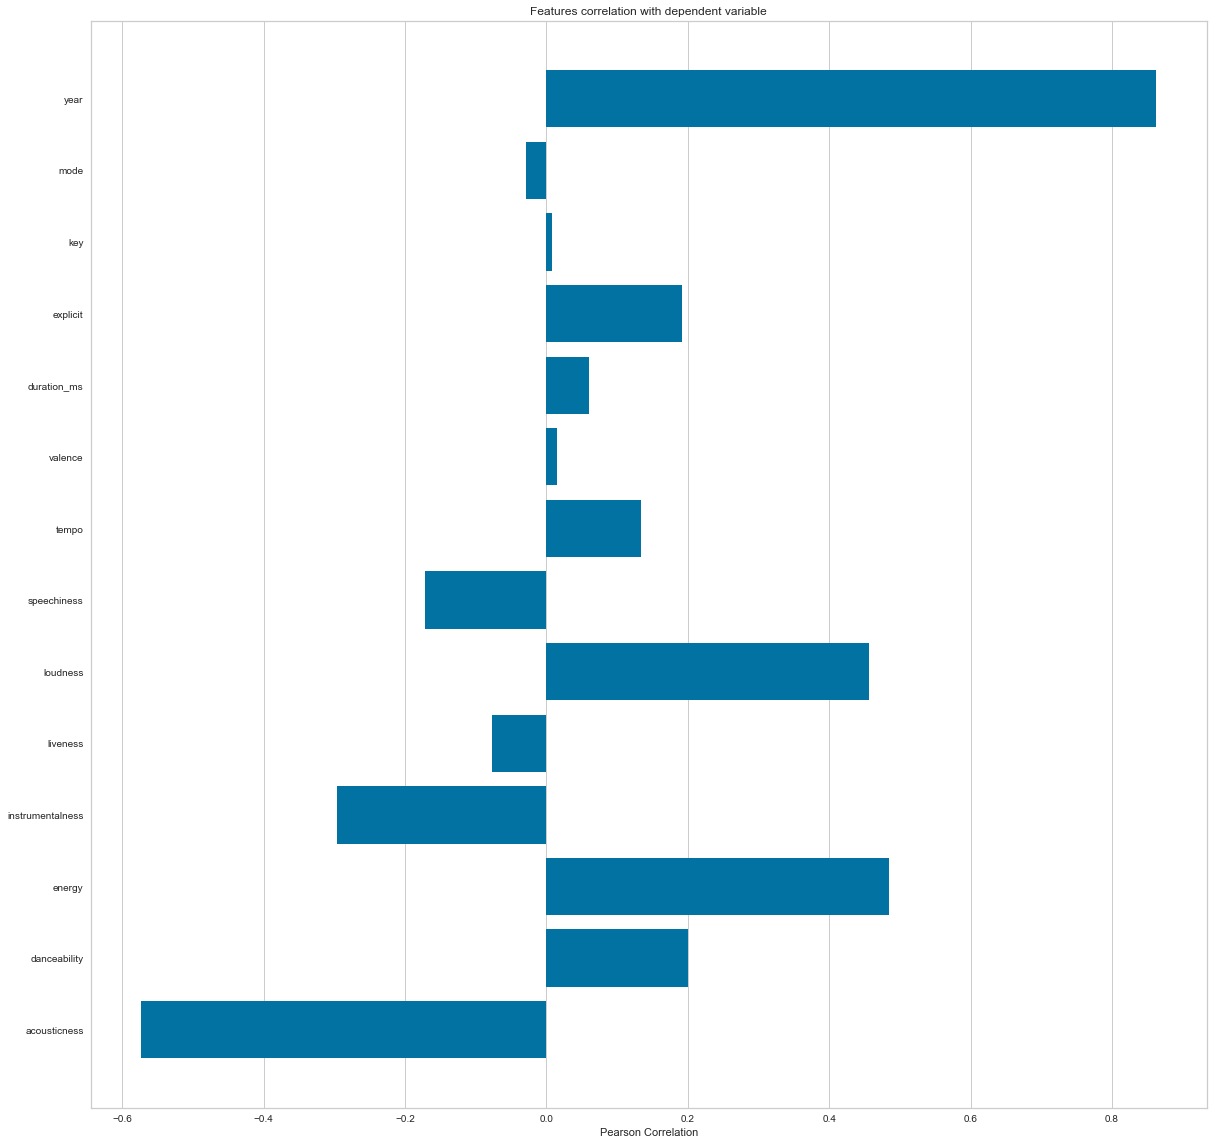

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [10]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = my_data[feature_names], my_data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [11]:
my_data.groupby('year').mean()

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
year,,,,,,,,,,,,,,
1921,0.379327,0.886896,0.418597,260537.166667,0.231815,0.046667,0.344878,5.093333,0.205710,-17.048667,0.673333,0.653333,0.073662,101.531493
1922,0.535549,0.938592,0.482042,165469.746479,0.237815,0.000000,0.434195,5.267606,0.240720,-19.275282,0.633803,0.140845,0.116655,100.884521
1923,0.625492,0.957247,0.577341,177942.362162,0.262406,0.000000,0.371733,4.810811,0.227462,-14.129211,0.789189,5.389189,0.093949,114.010730
1924,0.663725,0.940200,0.549894,191046.707627,0.344347,0.000000,0.581701,5.648305,0.235219,-14.231343,0.754237,0.661017,0.092089,120.689572
1925,0.621929,0.962607,0.573863,184986.924460,0.278594,0.000000,0.418297,5.107914,0.237668,-14.146414,0.730216,2.604317,0.111918,115.521921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.431532,0.284171,0.600202,221396.510295,0.592855,0.309961,0.093984,5.139121,0.181170,-8.061056,0.646077,59.647190,0.104313,118.652630
2017,0.416476,0.286099,0.612217,211115.696787,0.590421,0.338353,0.097091,5.122490,0.191713,-8.312630,0.623996,63.263554,0.110536,117.202740
2018,0.447921,0.267633,0.663500,206001.007133,0.602435,0.427960,0.054217,5.353780,0.176326,-7.168785,0.611983,63.296243,0.127176,121.922308


# Cheaking the year dataframe how music changes over the years

/Users/vipulsemwal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='whole_decade', ylabel='count'>

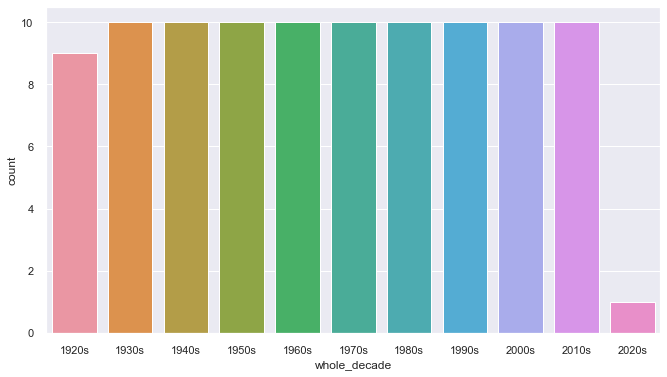

In [12]:
def get_by_year(year):
    start_year = int(year/10) *10
    whole_decade = '{}s'.format(start_year)
    return whole_decade

my_data_by_year['whole_decade'] =my_data_by_year['year'].apply(get_by_year)

sns.set(rc={'figure.figsize':(11,6)})
sns.countplot(my_data_by_year['whole_decade'])

In [13]:
my_data_by_year['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [14]:
len(my_data_by_year['year'].unique())

100

# Clustering songs with K-means

In [15]:
cluster_pipeline_songs = Pipeline([('scaler',StandardScaler()), 
                                   ( 'kmeans',KMeans(n_clusters=20))])

x=my_data.select_dtypes(np.number)
number_columns = list(x.columns)

cluster_pipeline_songs.fit(x)
song_cluster_labels= cluster_pipeline_songs.predict(x)
my_data['label_cluster']=song_cluster_labels

/Users/vipulsemwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
len(my_data['label_cluster'].unique())

20

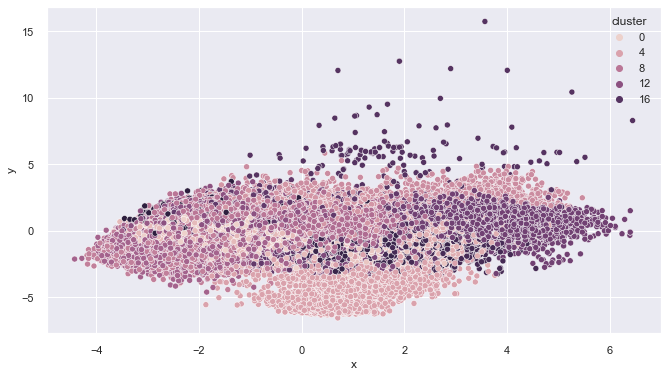

In [40]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = my_data['name']
projection['cluster'] = my_data['label_cluster']

fig = sns.scatterplot(
    data=projection, x='x', y='y', hue='cluster')

# Clustring genre with k means

In [47]:
cluster_pipeline_genere = Pipeline([('scaler',StandardScaler()), 
                                   ( 'kmeans',KMeans(n_clusters=20))])

x2=my_data_by_genere.select_dtypes(np.number)
cluster_pipeline_genere.fit(x2)
my_data_by_genere['cluster']= cluster_pipeline_genere.predict(x2)


/Users/vipulsemwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


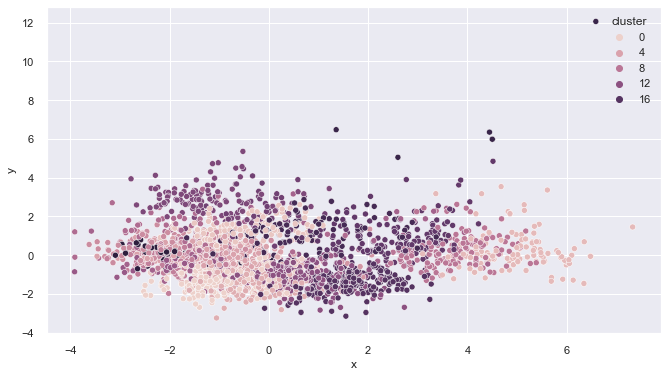

In [49]:
from sklearn.decomposition import PCA

pca_pipeline_genere = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
genere_embedding = pca_pipeline_genere.fit_transform(x2)
projection_genere = pd.DataFrame(columns=['x', 'y'], data=genere_embedding)
projection_genere['genres'] = my_data_by_genere['genres']
projection_genere['cluster'] = my_data_by_genere['cluster']

fig = sns.scatterplot(
    data=projection_genere, x='x', y='y', hue='cluster')

In [50]:
#my_data.head()
number_columns


['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [51]:
pip install spotipy

You are using pip version 8.1.1, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Recommendation System

In [52]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="1cb82e63cc6d49bcbe211605450df1f1",
                                                           client_secret="b25700ed095f40ce963fa25f130a5639"))

def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [53]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=20):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = cluster_pipeline_songs.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [54]:
recommend_songs([{'name': 'Of Wolf And Man', 'year':1991},
                {'name': 'No Excuses', 'year': 1994},
                {'name': 'Volví a Nacer', 'year': 2013},
                {'name': 'Life is a Highway', 'year': 2006},
                {'name': "'Janie's Got A Gun", 'year': 1993}],  my_data)

<ipython-input-53-ff270acbbe6c>:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  song_matrix = np.array(list(song_vectors))
/Users/vipulsemwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[{'name': 'Somebody Like You', 'year': 2002, 'artists': "['Keith Urban']"},
 {'name': 'Where Do Broken Hearts Go',
  'year': 2014,
  'artists': "['One Direction']"},
 {'name': 'Mirala Miralo', 'year': 1993, 'artists': "['Alejandra Guzman']"},
 {'name': 'Cowboy Casanova', 'year': 2009, 'artists': "['Carrie Underwood']"},
 {'name': 'Float On', 'year': 2004, 'artists': "['Modest Mouse']"},
 {'name': 'Click Click Boom', 'year': 2001, 'artists': "['Saliva']"},
 {'name': 'Adventure of a Lifetime', 'year': 2015, 'artists': "['Coldplay']"},
 {'name': 'Til I Forget About You',
  'year': 2010,
  'artists': "['Big Time Rush']"},
 {'name': 'Forever Young', 'year': 2018, 'artists': "['BLACKPINK']"},
 {'name': 'Little Secrets', 'year': 2009, 'artists': "['Passion Pit']"},
 {'name': 'Thrash Unreal', 'year': 2007, 'artists': "['Against Me!']"},
 {'name': 'Life is a Highway - From "Cars"',
  'year': 2009,
  'artists': "['Rascal Flatts']"},
 {'name': 'Just the Way You Are', 'year': 2010, 'artists': "['B